# Classification.
# Logistic Regression. KNN. Metrics.

Author: (andrewgarkavyy@gmail.com)


## 0. Contents

1. Logistic regression: theory

2. Logistic regression: practice

3. Comparison with KNN

3. Precision/Recall

4. ROC-AUC

5. Non-binary classification

## 1. Logistic regression: theory
(regression in the title, but it's actually a classification algorithm)


Consider * * the classification problem**. For simplicity, let's consider a binary classification: for each example in the training set, its class is specified: 0 or 1.

We need to learn how to restore a class based on its features.

We already know how to predict numbers (solve a regression problem) using a Linear Regression model. The easiest way is to use it to predict classes? Namely, we will simply predict these 0s and 1s.

It is even clear how to decide from the predicted number which class it is - if it is greater than 0.5, then class 1, otherwise class 0. 
(actually not so clear, this threshold is just intuitive choice, there is ROC-AUC metrics which don't depende on this human choice while estimating model's performance).

This approach works, but it is somewhat unnatural: suppose our model predicted the value 2 for an object of class 1. For such a prediction, it will receive the same punishment as for predicting 0: $(2-1)^2 = (0-1)^2$.

Let's try to come up with a more natural loss function. It is natural to assume that the larger the prediction of our model, the more confident it is that the object belongs to class 1.Let's try to interpret the model's prediction as the probability that the object belongs to class 1.

The model (theoretically) can output values from minus to plus infinity, so we need to learn how to turn the interval $(-\infty, \infty)$ into the interval $(0, 1)$. Such functions are called sigmoids because they resemble the letter s in appearance. The most standard such function is called the logistic function and looks like this:
$$
 \sigma(x) = \frac{1}{1 + e^{-x}}
$$

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd

In [ ]:
# sigmoid function
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

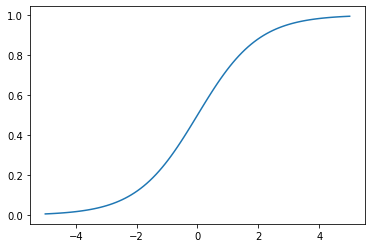

In [ ]:
x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid(x))

So, we can assume that if our model predicts the number $f(x)$ for an object $x$, this means that $p_x$ = $\sigma(f(x))$ - probability that the object belongs to class 1.

For this class 1 example, the probability that our model guessed correctly is $p_x$; for the class 0 example, this probability is $1-p_x$.

Let's calculate the probability that our model will 'guess' the value of all elements:

$$\prod_{x \in 1} p_x \prod_{x \in 0} (1-p_x)$$

We want to maximize this probability.

Working with the product is inconvenient, so let's take the logarithm:

$$\sum_{x \in 1} \ln(p_x)  + \sum_{x \in 0} \ln(1-p_x)$$

This would make a great loss function, but we want to minimize the loss function, and this function needs to be maximized for the best result. So multiply it by minus one.

$$Logloss = -\sum_{x \in 1} \ln(p_x)  - \sum_{x \in 0} \ln(1-p_x)$$

This loss function is called Logloss. It turns out that it is quite simple to optimize.

The algorithm we describe is called * * Logistic regression**. This is a binary classification algorithm (not regression, don't let the name confuse you):

1) the algorithm predicts $f(x)$ using a linear regression model ($f(x) = a_0 + a_1 x_1 + \ldots a_n x_n$)

2) from each value, a sigmoid is considered to predict the probability ($p_x = \sigma(f(x)) = \frac{1}{1 + e^{f(x)}}$)

3) these probabilities are considered Logloss ($Logloss = - \sum_{x \in 1} \ln(p_x) - \sum_{x \in 0} \ln(1-p_x)$)

4) parameters for the model are selected so that this logloss is minimal

5) the prediction is then made as follows: if the probability is greater than 0.5 (i.e. f(x) 0), then it is class 1, otherwise it is class 0.

You can also imagine that you are trying to separate points of two different colors using a plane. You predict all points in one half-space as class 0, and in the other half-space as class 1.

# 2. Logistic Regression: practice

As usual, this model is already available in the sklearn library.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000) 

We will work with a dataset containing data on about 18 thousand stars, some of which are pulsars.

Do the bottom lines if you are working on google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset: https://drive.google.com/file/d/1U4KWzrf5xAX09act1bjDjxNkMMmy7Ek1/view?usp=sharing

In [ ]:
import pandas as pd 
data = pd.read_csv('/content/drive/My Drive/Tinkoff Generation Exam/pulsar_stars.csv')

X = data.drop(columns=['target_class']) # убираем столбец с целевой переменной
y = data['target_class']

In [ ]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


As usual, we split the data into training and test parts.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

But unlike regression classification models often also have the ability to predict the probability of belonging to a class:

In [ ]:
y_pred_proba = log_reg.predict_proba(X_test)
y_pred_proba

array([[0.99360291, 0.00639709],
       [0.24067499, 0.75932501],
       [0.98212309, 0.01787691],
       ...,
       [0.99724715, 0.00275285],
       [0.99432175, 0.00567825],
       [0.98104474, 0.01895526]])

# 3. Comparison with KNN

How do I know if the result was good? The simplest thing is to do it as in regression, compare the metric used on our model and on some other one. Let's take three models:

1) Predict all 0s (a star is almost always not a pulsar anyway)

2) Log regression

3) KNN

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0: 11375, 1: 1153})

It turns out that a star is 10 times more likely to be a non-pulsar than a pulsar (at least in our dataset).

In [ ]:
import numpy as np
y_pred_const = np.zeros(len(X_test)) 
y_pred_proba_const = y_pred_const
y_pred_proba_const

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]  # оставили только второй столбец
y_pred_proba_log_reg

array([0.00639709, 0.75932501, 0.01787691, ..., 0.00275285, 0.00567825,
       0.01895526])

It remains to train the KNN model.

**The K Nearest Neighbors methodw** consists in treating each object as a point in an $n$ - dimensional space, where $n$ is the number of features. Then to predict the class of any new point, we just need to find $K$ objects closest to it in the training part and choose the most popular class among them.

Naturally, this model is also already written in sklearn.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # let's choose K=5
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]  # only second column
y_pred_proba_knn[:10]

array([0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. ])

This algorithm is not designed to predict the probability of belonging to a class, and it does so very naively and crudely: if exactly $T$ belong to class 1 among $K$ neighbors, then the probability of belonging to class 1 is $\frac{T}{K}$.

Now it remains to compare our predicted results. For example, since we learned log. regression on logloss, let's compare it (remember, for regression, we compared MSE).

**Task**: implement logloss.
$$Logloss = -\sum_{x \in 1} \ln(p_x)  - \sum_{x \in 0} \ln(1-p_x)$$

In [ ]:

def logloss(y_true, y_pred):
  pass


In [ ]:
from sklearn.metrics import log_loss
import numpy as np
log_loss(np.array([0, 1, 0, 1, 0]), np.array([0.2, 0.8, 0.4, 0.6, 0.6]), normalize=False)

2.384229082034556

In [ ]:
# Test:
print('Logloss =', logloss(np.array([0, 1, 0, 1, 0]), np.array([0.2, 0.8, 0.4, 0.6, 0.6])))
print('Real answer =', -(np.log(0.8) + np.log(0.8) + np.log(0.6) + np.log(0.6) + np.log(0.4)))

Logloss = 2.384229082034556
Real answer = 2.384229082034556


Let's see what the log loss is on different models.

In [ ]:
logloss(y_test, y_pred_proba_const)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


inf

Our 'all probabilities are 0' model does not work: if we have guessed all classes, then we really get a logloss of 0. But if we make a mistake at least once, we will get the minus logarithm of 0, that is, infinity. You can never predict the probability in logloss as directly 0.

In [ ]:
logloss(y_test, y_pred_proba_log_reg)

407.5589920357918

In [ ]:
logloss(y_test, y_pred_proba_knn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


inf

KNN has the same problem: too many probabilities equal to 0.


As we can see, Logloss is so-so suitable for comparing classification results - naive models often have infinities there, and the number itself does not mean anything specific. In MSE, we at least roughly understood what the mean square of deviations is, but here it is an absolutely meaningless number.

Let's better calculate **accuracy** - accuracy. That is, simply the **proportion of objects with a correctly predicted class**.

(in general, calling it 'accuracy' is a bad idea, because the other metric that we will consider today (precision) into Russian has exactly the same translation)

**Required task 2:** implement the accuracy function.

In [ ]:
# Implement accuracy function

def accuracy(y_real, y_pred):
  
  
  # hint :-)
  # return np.sum(y_real == y_pred) / y_real.size


In [ ]:
# Test:
print('Accuracy =', accuracy(np.array([0, 1, 0, 1, 0]), np.array([0, 0, 0, 1, 1])))
print('Real answer =', 0.6)

Accuracy = 0.6
Real answer = 0.6


Let's see what accuracy is on different models.

In [ ]:
accuracy(y_test, y_pred_const)

0.9094972067039107

In [ ]:
accuracy(y_test, y_pred_log_reg)

0.9782122905027933

In [ ]:
accuracy(y_test, y_pred_knn)

0.9733705772811918

So, we clearly see that the accuracy of constant prediction (all stars are not pulsars) is already 90%. Indeed, in the test part, only about the 10th star is also a pulsar.

And accuracy and Logistic regression, and KNN is not much higher, it is just over 97%. On my particular split into train and test, it turned out that accuracy of log. regression is still better, but it is not yet clear whether this is an error and there is no particular difference, or there is still a significant advantage.

A big problem is immediately visible here: due to the imbalance of classes (9 to 1), the accuracy of a naive prediction easily gains 90% right away. It is very difficult to compare models by the metric, which for all normal models is on a small interval $[0.9, 1.0]$. And imagine that there would be even fewer pulsars: one out of a hundred stars. And this happens very often in life - for example, in advertising, you need to understand whether the user will click on this banner, and there are very, very few of these clicks on the banner in the data, usually there is still no click. Therefore, the 'always no click' model will immediately gain 99% accuracy.

For such wildly unbalanced data, some other, more telling metrics are needed.

# 4. Precision / Recall

To get around this problem, two other metrics are often considered: **precision** (precision) and **recall** (recall). Suppose we still have a binary classification, and there are a lot of class 0, but less class 1.

Presicion is the proportion of objects of class 1 among all objects that our classifier assigned to class 1.

Recall is the proportion of objects of class 1 that our classifier determined correctly among all objects of class 1:

**Mandatory task 3:** implement these two functions.

In [ ]:
def precision(y_real, y_pred):
 
 # hint
 # return np.sum(((y_real == 1) == y_pred)) / (y_pred == 1).size

def recall(y_real, y_pred):
  
  # hint
  # return np.sum((y_real == y_pred) & (y_real == 1)) / (y_real == 1).size

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print(precision_score(y_test, y_pred_const))
print(recall_score(y_test, y_pred_const))

0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(precision_score(y_test, y_pred_log_reg))
print(recall_score(y_test, y_pred_log_reg))

0.9424460431654677
0.808641975308642


In [ ]:
print(precision_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))

0.9054373522458629
0.7880658436213992


What results did we get?

1) The 'always say 0' constant prediction gets nan precision (this is the proportion of pulsars among the predicted pulsars, and we decided not to predict any) and 0 recall (this is the proportion of pulsars that we found, but we did not find anything).

2) Among those predicted by KNN and Log. pulsar regressions 90%-94% of stars are indeed pulsars.

3) But among all pulsars, our models found only 78% -80% of pulsars.

4) In general, it turns out that the models predict pulsars rather accurately, but they still do not find much (precision is greater than recall).

Often, in order to take into account the imbalance of our set, we can set different weights for different classes.
For example, Log. Regression is a parameter class_weight that takes a dictionary that maps each class to its weight.

In this case, the weight participates in the Logloss - each term with the real class 1 is simply multiplied by the weight of class 1, and the term with the real class 0 is simply multiplied by the weight of class 0.

Essentially, these weights mean how much more important it is to predict class 0 or class 1 well.

$$Logloss = -w_1 \sum_{x \in 1} \ln(p_x)  -w_0 \sum_{x \in 0} \ln(1-p_x)$$

In the original data, almost all the stars were not pulsars (class 0), and their quality of prediction was much more important, let's balance the weights (so half the weight will come from ordinary stars and half the weight from pulsars).

In [ ]:
log_reg_w = LogisticRegression(class_weight={0: 1, 1: 10},  max_iter=1000)

In [ ]:
log_reg_w.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 10}, max_iter=1000)

In [ ]:
y_pred_w = log_reg_w.predict(X_test)
y_pred_proba_w = log_reg_w.predict_proba(X_test)[:, 1]

In [ ]:
print(precision_score(y_test, y_pred_w))
print(recall_score(y_test, y_pred_w))

0.7735191637630662
0.9135802469135802


The precision of the classifier has noticeably decreased - it began to say '1' more often (since it is now not so terrible to make a mistake with a nepulsar), but the completeness has increased markedly. Whether that's good or bad depends on how we're going to use our classifier.

If it is very important for us not to miss a single pulsar (and if we also call a star a pulsar by mistake, then it is not very scary), we need to grow recall - this is possible, for example, if later the selected stars are looked at in the radio telescope and the prediction is refined.

Or maybe it's important for us not to call a pulsar a star that is not a pulsar (for example, we will send an expensive research probe to all potential pulsars - it is not terrible to miss some, but it is very disappointing to send a probe to a non-pulsar).


For completeness, we introduce two more definitions:
- Type I error (false positive) - the situation when our model assigned a class 0 object to class 1
- Type II error (false negative) - a situation where our model has assigned a class 1 object to class 0

Similarly, correct predictions can be divided into true positives and true negatives

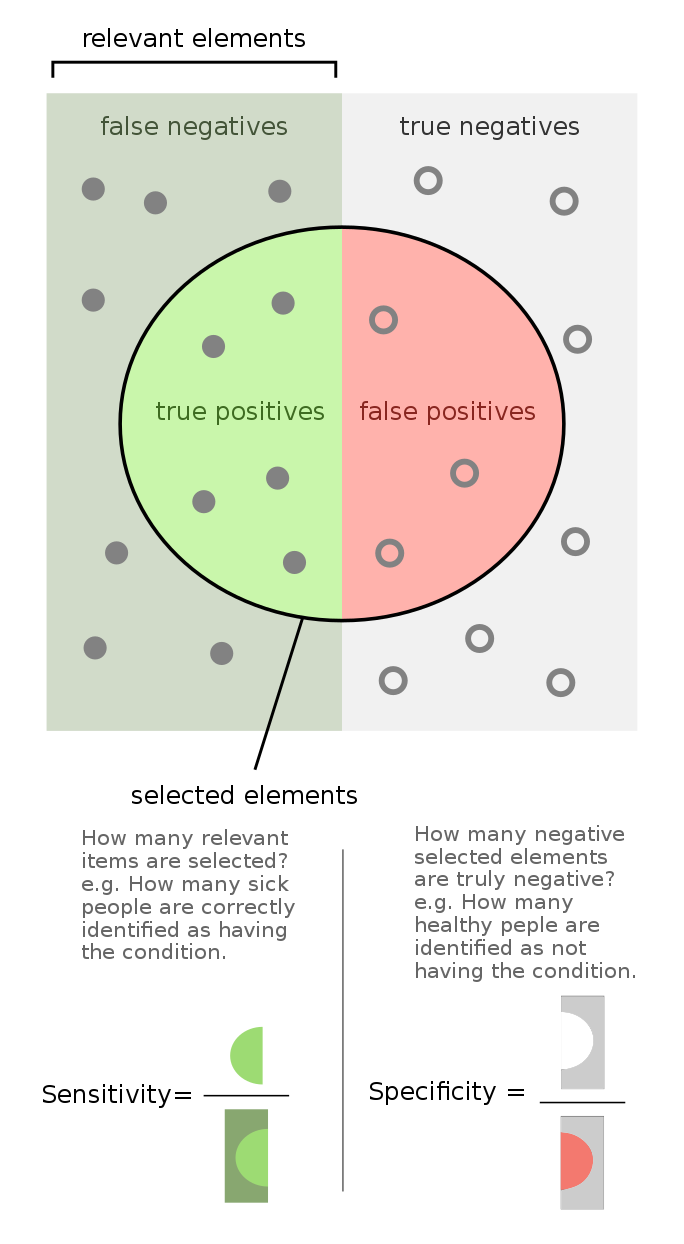
How to remember what a error is what: in the fairy tale about the boy who shouted 'Wolf!' first describes the mistake of the first kind, and then - the second.

![Ошибки](errors.jpg)

**Task 5:** Plot the precision dependency and recall on the weight ratio in the logistic regression.

Let the weight of class 0 always be equal to 1, sort out what is the weight of class 1.

AttributeError: ignored

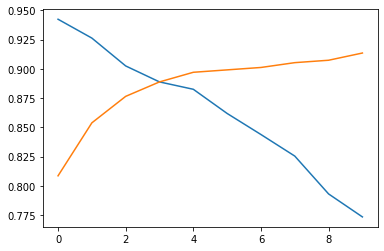

In [ ]:
import matplotlib.pyplot as plt

precision_results = []
recall_results = []

for first_weight in range(1, 11):
  log_reg = LogisticRegression(class_weight={0: 1, 1: first_weight}, max_iter=1000)
  log_reg.fit(X_train, y_train)

  y_pred = log_reg.predict(X_test)

  precision_results.append(precision_score(y_test, y_pred))
  recall_results.append(recall_score(y_test, y_pred))

plt.plot(precision_results)
plt.plot(recall_results)

plt.legend(['precision', 'recall'])

plt.show()

There is a metric that combines precision and completeness - their average harmonic. This metric is called $F_$1 measure:

$$ F_1 = \frac{2* precision*recall}{precision+recall}$$

**Task 6:** add F_1 score to your plot.

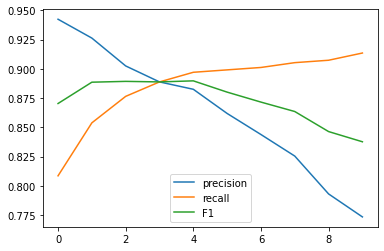

CPU times: user 6.09 s, sys: 5.2 s, total: 11.3 s
Wall time: 7.1 s


In [ ]:
%%time
from sklearn.metrics import f1_score

precision_results = []
recall_results = []
f1_results = []

for first_weight in range(1, 11):
  log_reg = LogisticRegression(class_weight={0: 1, 1: first_weight}, max_iter=1000)
  log_reg.fit(X_train, y_train)

  y_pred = log_reg.predict(X_test)

  precision_results.append(precision_score(y_test, y_pred))
  recall_results.append(recall_score(y_test, y_pred))
  f1_results.append(f1_score(y_test, y_pred))

plt.plot(precision_results)
plt.plot(recall_results)
plt.plot(f1_results)

plt.legend(['precision', 'recall', 'F1'])

plt.show()

# 5. ROC-AUC

Let's continue to study binary classification metrics. Let's imagine that we predicted pulsars - but we need to study them in some order. In decreasing order of probability, they are pulsars.

We need to somehow teach how well we predicted probabilities in terms of order**.

Let's sort out all the stars by the probability that they are pulsars. If we were to perfectly predict pulsars, then first in this list there are exclusively non-pulsars, and then only pulsars.

In reality, of course, there will be mistakes.

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.00639709, 0.75932501, 0.01787691, ..., 0.00275285, 0.00567825,
       0.01895526])

In [ ]:
list(zip(X_test.index, y_pred_proba))[:5]

[(15985, 0.006397089361478767),
 (8188, 0.7593250080915254),
 (8157, 0.017876910446350775),
 (2589, 0.49044181416942734),
 (11909, 0.013926889908886148)]

In [ ]:
sorted_by_proba = sorted(list(zip(X_test.index, y_pred_proba)), key=lambda x: x[1])
sorted_by_proba[-5:]

[(5478, 0.9999517238083173),
 (2037, 0.9999528297947264),
 (4572, 0.9999564749758151),
 (8193, 0.9999572541475287),
 (2626, 0.9999579581424218)]

In [ ]:
results = [y_test[id] for id, proba in sorted_by_proba]
print(results[:25])
print(results[1000:1025])
print(results[4800:4825])
print(results[5000:5025])
print(results[-25:])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


So we sorted by the probability of belonging to class 1 - and indeed, first the objects of class 0 go for a long time, then at some point pulsars begin to appear, then there are more and more of them, and at the end they remain exclusively (well, for some reason except for the last one in my case).

Data scientists love to draw an ROC curve.

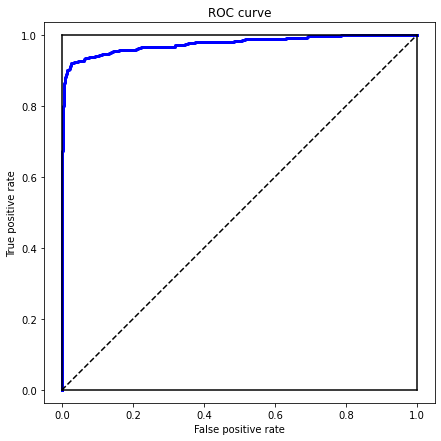

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

The ROC curve generally has two definitions.

1) Here we have an array of objects sorted by probability. We need to decide where to cut it into two parts - we will predict all the left as class 0, and the right as class 1.

For each possible cut, let's just count two metrics and draw a graph of one's dependence on the other:

$$False\space positive\space rate = \frac{FP}{FP + TN} = \frac{FP}{size(0)}$$
$$True\space positive\space rate = \frac{TP}{TP + FN} = \frac{TP}{size(1)}$$

False positive rate is the proportion of predicted pulsars among real non-pulsars.

True positive rate is the proportion of predicted pulsars among real pulsars.

2) Our curve starts at the point $(0, 0)$ and ends at the point $(1, 1)$ (indeed, if we all consider non-pulsars, then FPR = 0, TPR = 0, otherwise FPR = 1, TPR = 1.

Between them, she should take a few steps up and to the right. Let's just go from left to right through our list and every time we come across a class 0 object, take a step up on $\frac{1}{size(0)}$, and when you meet a class 1 object, step right on $\frac{1}{size(1)}$. Then we will eventually come from (0, 0) to (1, 1), and it will turn out exactly the same curve.

Indeed, each time we actually just move one object from class 0 to class 1. If its real class is 0, then the TPR has not changed, and the FPR has increased by $\frac{1}{size(0)}$. If its real class is 1, then FPR has not changed, and TPR has increased by $\frac{1}{size(1)}$. So it's the same thing.

A curve is fine, but we'd like a numerical metric that says how good the resulting order of probabilities is. For this, they usually take the area under this curve ** (Areas Under Curve - AUC), it is also called ROC-AUC.

It's no bigger than 1, and the higher and to the left that curve, the better.

Almost always, the ROC AUC is 0.5 (otherwise it is easy to fix - you just need to turn all the probabilities upside down).

RoC AUC allows you to deeply evaluate the quality of the predicted probabilities. Accuracy, Precision, and Recall worked only with the class predictions themselves, and did not affect the probabilities in any way.

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.9756161885791516

# 6. Non-binary classification

All this time we have been considering only the problem of binary classification, but what to do when there are more classes than 2? In fact, there is an easy way to reduce any classification to binary.

The technique is called **One vs The Rest**. Let's just consider each class as an independent binary classification, and predict the probabilities that this element lies in that class, or does not.

So for each class, we get the probability of whether there is an object in it. From these, we will already be able to choose the best class for this object. And to get the probabilities of belonging to each class, these numbers still need to be normalized so that in total they give 1.

Let's look at the dataset with the numbers, for example.

In [ ]:
from sklearn.datasets import load_digits
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
X = data['data']
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

These features are actually the brightness of the pixels of this 8x8 picture. Each pixel is a number between 0 and 15.

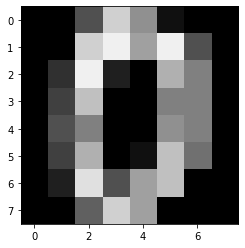

In [ ]:
def draw_digit(features):
    plt.imshow(features.reshape(8, 8), cmap=plt.cm.gray, vmax=16, interpolation='nearest')

draw_digit(X[0])

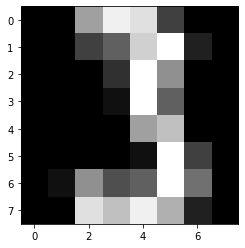

In [ ]:
draw_digit(X[60])

In [ ]:
y = data['target']
Counter(y)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In logistic regression, the One vs The Rest mod is already enabled by default and it works for several classes.

In [ ]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 5, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

predict_proba now returns an array with the probabilities of each of the 10 classes.

In [ ]:
y_pred_proba_log_reg = log_reg.predict_proba(X_test)
y_pred_proba_log_reg[0]

array([6.33969785e-08, 3.91379239e-11, 1.35790410e-13, 1.47352919e-13,
       1.28923442e-09, 2.30352715e-11, 9.99987868e-01, 3.85793706e-11,
       1.20674096e-05, 1.35688875e-11])

In [ ]:
sum(y_pred_proba_log_reg[0])

1.0

But for KNN there is no difference at all, two classes or more: the algorithm works exactly the same way - it chooses the most popular class from $K $ neighbors.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 4, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [ ]:
y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_proba_knn[3]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_log_reg))
print(accuracy_score(y_test, y_pred_knn))

0.9722222222222222
0.9861111111111112


The Accuracy metric is one of the few that easily transfers from binary to non-binary. It's still just a fraction of objects with correctly guessed classes.

As we can see, both models known to us work on numbers very, very coolly, given that there are 10 balanced classes, and they guess more than 96%.

There are problems with other metrics - it's not obvious how to generalize them into several classes. There are usually two ways to do this.

- macro is an analogue of One vs The Rest, the metric is simply counted for each class independently, and then averaged

- micro is a more complicated thing, here you need to consider each pair of 'object, class' as objects, and as if counting metrics on binary classification in this problem

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
print(precision_score(y_test, y_pred_log_reg, average='macro'))
print(precision_score(y_test, y_pred_knn, average='macro'))

0.9735814591088425
0.9879206496042758


In [ ]:
print(precision_score(y_test, y_pred_log_reg, average='micro'))
print(precision_score(y_test, y_pred_knn, average='micro'))

0.9722222222222222
0.9861111111111112


In [ ]:
print(recall_score(y_test, y_pred_log_reg, average='macro'))
print(recall_score(y_test, y_pred_knn, average='macro'))

0.9743702791014647
0.9878035043804756


In [ ]:
print(recall_score(y_test, y_pred_log_reg, average='micro'))
print(recall_score(y_test, y_pred_knn, average='micro'))

0.9722222222222222
0.9861111111111112


In [ ]:
print(f1_score(y_test, y_pred_log_reg, average='macro'))
print(f1_score(y_test, y_pred_knn, average='macro'))

0.9738640962411946
0.9877979367135244


In [ ]:
print(f1_score(y_test, y_pred_log_reg, average='macro'))
print(f1_score(y_test, y_pred_knn, average='macro'))

0.9738640962411946
0.9877979367135244


As you can see, on this dataset everywhere you get the same ))